In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
sns.set()

In [2]:
url='https://www.gutenberg.org/files/15784/15784-0.txt'

In [3]:
response= requests.get(url)

In [5]:
soup_dos=BeautifulSoup(response.content,'html.parser')

In [6]:
len(soup_dos)

1

In [7]:
dos_text=soup_dos.get_text()

In [8]:
dos_text[:100]

'The Project Gutenberg EBook of The Chronology of Ancient Kingdoms Amended\r\nby Isaac Newton\r\n\r\nThis e'

In [11]:
from nltk.tokenize import RegexpTokenizer

In [12]:
tokenizer=RegexpTokenizer('\w+')

In [14]:
tokens=tokenizer.tokenize(dos_text)

In [15]:
tokens[:15]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms',
 'Amended',
 'by',
 'Isaac',
 'Newton',
 'This']

In [16]:
words=[]
for word in tokens:
    words.append(word.lower())

In [17]:
words[:15]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'chronology',
 'of',
 'ancient',
 'kingdoms',
 'amended',
 'by',
 'isaac',
 'newton',
 'this']

In [18]:
from nltk.corpus import stopwords

In [20]:
stop_words=set(stopwords.words('english'))

In [21]:
filter_text=[word for word in words if not word in stop_words ]

In [22]:
filter_text[:15]

['project',
 'gutenberg',
 'ebook',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac',
 'newton',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost']

In [23]:
import nltk

In [24]:
text=nltk.Text(filter_text)

In [25]:
text[:15]

['project',
 'gutenberg',
 'ebook',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac',
 'newton',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost']

In [26]:
fdist=nltk.FreqDist(text)

In [27]:
fdist.most_common(15)

[('years', 568),
 ('_', 434),
 ('year', 387),
 ('_egypt_', 381),
 ('king', 379),
 ('son', 323),
 ('l', 316),
 ('reign', 292),
 ('first', 268),
 ('kings', 266),
 ('1', 239),
 ('one', 238),
 ('days', 226),
 ('called', 223),
 ('c', 217)]

In [29]:
fdist['blood']

5

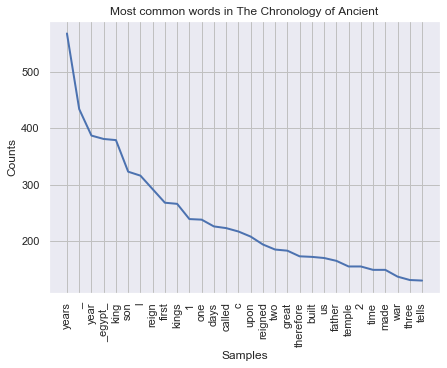

In [47]:
plt.figure(figsize=(7,5))
plt.title('Most common words in The Chronology of Ancient')
fdist.plot(30)

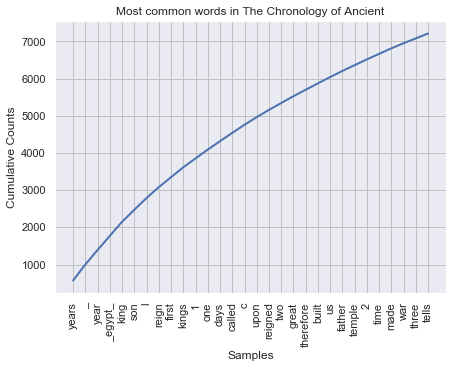

In [48]:
plt.figure(figsize=(7,5))
plt.title('Most common words in The Chronology of Ancient')
fdist.plot(30, cumulative=True)

In [50]:
tagged=nltk.pos_tag(text)

In [51]:
tagged[:15]

[('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('chronology', 'NN'),
 ('ancient', 'NN'),
 ('kingdoms', 'NNS'),
 ('amended', 'VBD'),
 ('isaac', 'JJ'),
 ('newton', 'NN'),
 ('ebook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('cost', 'VBZ'),
 ('almost', 'RB')]

In [52]:
text.similar('king')

reign son kings brother last one therefore year father according
called great years began war within man grandfather nabonass conquest


In [54]:
text.common_contexts(['king','brother'])

days_king son_father year_king kingdom_upon


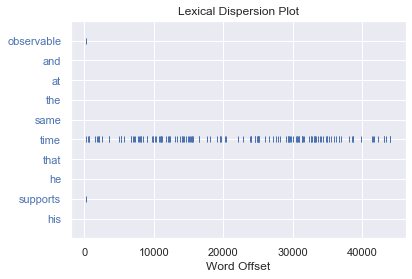

In [55]:
text.dispersion_plot(words[500:510])

In [56]:
len(set(text))/len(text)

0.1888267703775725

In [58]:
text.count('kings')

266

In [60]:
long_words=[w for w in words if len(w)>10]
long_words

['restrictions',
 'distributed',
 'proofreading',
 '_alexander_',
 'encouragement',
 'extraordinary',
 'productions',
 '_chronology_',
 'demonstration',
 'judiciousness',
 'suggestions',
 'authorities',
 'accompanies',
 'presumptuous',
 '_chronology_',
 'intersperses',
 'observations',
 'occasionally',
 '_astronomy_',
 'observation',
 'penetration',
 'contemplate',
 'persecution',
 'christians_',
 'oppression_',
 'indispensable',
 'administred',
 'distinguished',
 'benevolence',
 'establishes',
 'magnanimity',
 'conspicuous',
 'distinguished',
 'administration',
 'cultivating',
 'instructive',
 'entertainment',
 'speculation',
 'beneficence',
 'generations',
 'perpetuated',
 'transmitted',
 '_alexander_',
 'contemporary',
 '_babylonians_',
 'description',
 'advertisement',
 'continuation',
 'advertisement',
 'imperfections',
 'inseparable',
 '_alexander_',
 'introduction',
 'antiquities',
 '_pherecydes',
 '_pherecydes',
 'atheniensis_',
 'antiquities',
 'genealogies',
 'genealogers',
 

In [61]:
text.collocations

<bound method Text.collocations of <Text: project gutenberg ebook chronology ancient kingdoms amended isaac...>>

In [63]:
from wordcloud import WordCloud, STOPWORDS

In [75]:
df=pd.DataFrame(long_words)

In [74]:
wordcloud=WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS).generate(str(df[0]))

(-0.5, 399.5, 199.5, -0.5)

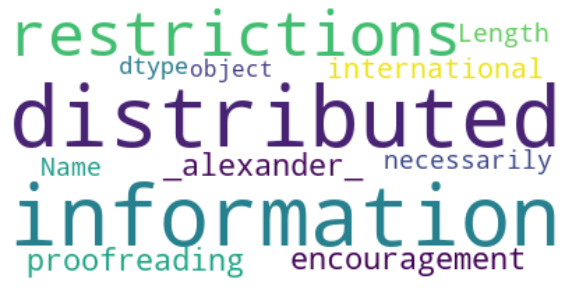

In [72]:
plt.figure(figsize=(10,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')